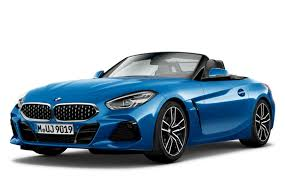

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '../input/datasets-zip/Datasets/Train'
valid_path = '../input/datasets-zip/Datasets/Test'


In [3]:
import pathlib
import os

In [4]:
train_dir_pathlib = pathlib.Path("../input/datasets-zip/Datasets/Train/")
train_dir_pathlib

len(list(train_dir_pathlib.glob("audi/*.jpg")))

20

In [5]:
audi=list(train_dir_pathlib.glob("audi/*.jpg"))

In [6]:
import PIL

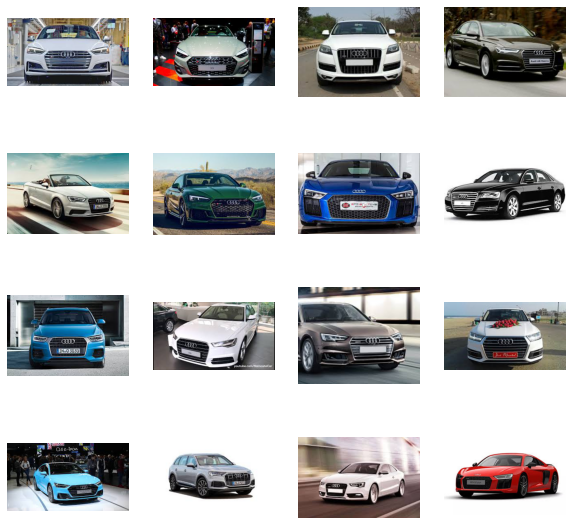

In [7]:
plt.figure(figsize = (10,10))

for i in range(16):
    plt.subplot(4,4,i+1)
    img = PIL.Image.open(str(audi[i]))
    plt.imshow(img)
    plt.axis('off')
    
plt.show()

In [8]:
lamborghini=list(train_dir_pathlib.glob("lamborghini/*.jpg"))

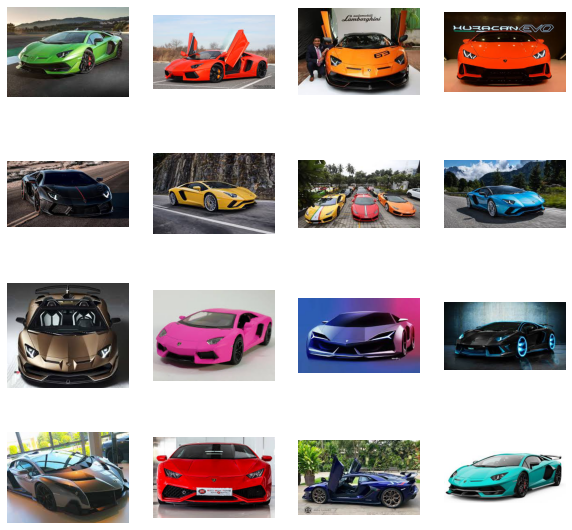

In [9]:
plt.figure(figsize = (10,10))

for i in range(16):
    plt.subplot(4,4,i+1)
    img = PIL.Image.open(str(lamborghini[i]))
    plt.imshow(img)
    plt.axis('off')
    
plt.show()

In [10]:
mercedes=list(train_dir_pathlib.glob("mercedes/*.jpg"))

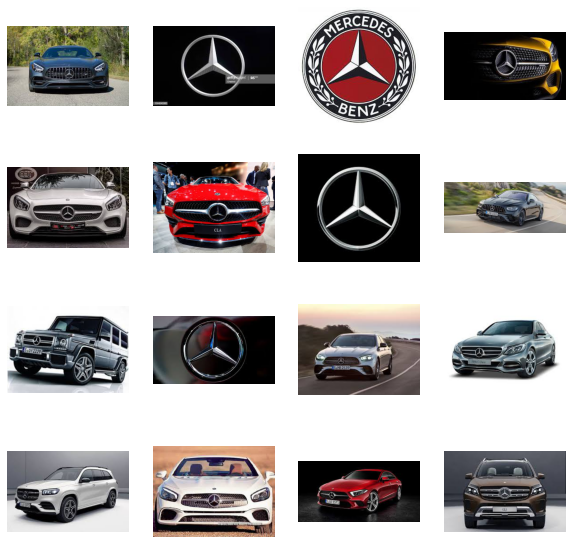

In [11]:
plt.figure(figsize = (10,10))

for i in range(16):
    plt.subplot(4,4,i+1)
    img = PIL.Image.open(str(mercedes[i]))
    plt.imshow(img)
    plt.axis('off')
    
plt.show()

In [12]:

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


94773248/94765736 [==============================] - 1s 0us/step


In [13]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [14]:
  # useful for getting number of output classes
folders = glob('../input/datasets-zip/Datasets/Train/*')

In [15]:
len(folders)

3

In [16]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [17]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [18]:

# view the structure of the model
model.summary()


Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [19]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [20]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [21]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('../input/datasets-zip/Datasets/Train/',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [22]:
test_set = test_datagen.flow_from_directory('../input/datasets-zip/Datasets/Test/',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [23]:
len(test_set)

2

In [24]:
len(training_set)

2

In [25]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(test_set),
  validation_steps=len(test_set)
)

Epoch 1/50
2/2 [==============================] - 2s 971ms/step - loss: 4.9516 - accuracy: 0.2812 - val_loss: 19.7827 - val_accuracy: 0.1552
Epoch 2/50
2/2 [==============================] - 1s 332ms/step - loss: 10.9404 - accuracy: 0.3438 - val_loss: 13.5717 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 1s 338ms/step - loss: 9.1020 - accuracy: 0.3906 - val_loss: 5.3570 - val_accuracy: 0.3276
Epoch 4/50
2/2 [==============================] - 1s 330ms/step - loss: 3.7491 - accuracy: 0.4375 - val_loss: 4.5702 - val_accuracy: 0.5172
Epoch 5/50
2/2 [==============================] - 1s 328ms/step - loss: 4.4696 - accuracy: 0.3125 - val_loss: 5.7527 - val_accuracy: 0.1552
Epoch 6/50
2/2 [==============================] - 1s 313ms/step - loss: 5.1275 - accuracy: 0.3594 - val_loss: 4.6646 - val_accuracy: 0.1552
Epoch 7/50
2/2 [==============================] - 1s 312ms/step - loss: 2.0911 - accuracy: 0.5312 - val_loss: 2.5262 - val_accuracy: 0.3448
Epoch 8/50
2/2 [=

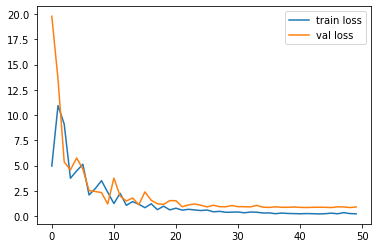

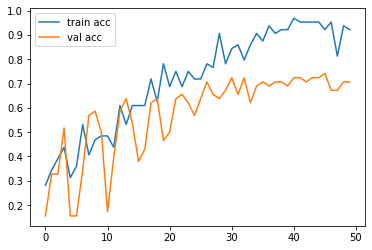

<Figure size 432x288 with 0 Axes>

In [26]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [27]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [28]:

y_pred = model.predict(test_set)


In [29]:
y_pred

array([[5.07292628e-01, 1.94956928e-01, 2.97750473e-01],
       [1.96171589e-02, 3.48970592e-01, 6.31412268e-01],
       [6.86063319e-02, 1.06870914e-02, 9.20706570e-01],
       [2.41587479e-02, 5.77330031e-03, 9.70067918e-01],
       [8.91312003e-01, 5.50379120e-02, 5.36500737e-02],
       [1.15250163e-02, 1.59869972e-03, 9.86876249e-01],
       [5.59986606e-02, 7.42579520e-01, 2.01421842e-01],
       [1.45642014e-04, 9.93276715e-01, 6.57768222e-03],
       [9.79970675e-04, 9.65400815e-01, 3.36192884e-02],
       [4.95858537e-03, 3.91496629e-01, 6.03544712e-01],
       [9.36576843e-01, 3.29616554e-02, 3.04614604e-02],
       [2.27265447e-01, 2.60294735e-01, 5.12439787e-01],
       [3.30661386e-02, 6.87768832e-02, 8.98156941e-01],
       [1.55879725e-02, 8.70823503e-01, 1.13588504e-01],
       [2.64559016e-02, 4.68690366e-01, 5.04853785e-01],
       [3.00349556e-02, 4.14956390e-04, 9.69550014e-01],
       [3.35567049e-03, 1.86083496e-01, 8.10560882e-01],
       [3.75927091e-02, 6.20516

In [30]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [31]:
y_pred

array([0, 2, 2, 2, 0, 2, 1, 1, 1, 2, 0, 2, 2, 1, 2, 2, 2, 1, 0, 0, 1, 2,
       2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 0, 1,
       2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 0])

In [32]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [33]:
model=load_model('model_resnet50.h5')

In [34]:
img=image.load_img('../input/datasets-zip/Datasets/Test/lamborghini/11.jpg',target_size=(224,224))



In [35]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [36]:
x.shape

(224, 224, 3)

In [37]:
x=x/255

In [38]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [39]:
model.predict(img_data)

array([[0.003221  , 0.07527248, 0.92150646]], dtype=float32)

In [40]:
a=np.argmax(model.predict(img_data), axis=1)

In [41]:
a

array([2])

In [42]:
a==1

array([False])